<a href="https://colab.research.google.com/github/Hemanth0411/Machine-Learning/blob/main/ML%20Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [ ]:
import numpy  as np
import pandas as pd


## Importing Data

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML in udemy/Data.csv')
x = dataset.iloc[:,:-1].values   # Independant Variable

y = dataset.iloc[:,-1].values    #Dependant variable

In [ ]:
dataset.head(10)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
dataset.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

## Handling missing data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') # Change 'NaN' to np.nan
imputer = imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:,1:3])
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Encoding categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_ = LabelEncoder()
x[:,0] = label_.fit_transform(x[:,0])
x

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [ ]:
dt = x[:,0]
dt_ = dt.reshape(-1,1)
encoder = OneHotEncoder(sparse_output=False)
dt = encoder.fit_transform(dt_)
dt

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
x = np.hstack((dt,x[:,1:]))
x

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [ ]:
y = label_.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)
print(x_test)


[[-1.          2.64575131 -0.77459667  0.26306757  0.12381479]
 [ 1.         -0.37796447 -0.77459667 -0.25350148  0.46175632]
 [-1.         -0.37796447  1.29099445 -1.97539832 -1.53093341]
 [-1.         -0.37796447  1.29099445  0.05261351 -1.11141978]
 [ 1.         -0.37796447 -0.77459667  1.64058505  1.7202972 ]
 [-1.         -0.37796447  1.29099445 -0.0813118  -0.16751412]
 [ 1.         -0.37796447 -0.77459667  0.95182631  0.98614835]
 [ 1.         -0.37796447 -0.77459667 -0.59788085 -0.48214934]]
[[-1.          2.64575131 -0.77459667 -1.45882927 -0.90166297]
 [-1.          2.64575131 -0.77459667  1.98496442  2.13981082]]


# K-Nearest Neighbor

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML in udemy/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
x=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values

## Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train[0:5]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

In [ ]:
x_test[0:5]

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ]])

## Fitting into the model & Prediction

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski')
classifier.fit(x_train, y_train)



KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)

## Confusion Matrix (Evaluation)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [ ]:
cm

array([[64,  4],
       [ 3, 29]])

# Support Vector Machine

In [ ]:
import pandas as pd
import numpy as np

## Importing the dataset & Splitting the dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML in udemy/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
x=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Feature Scaling & Fitting SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
classifier1 = SVC(kernel = 'rbf', random_state=0)
classifier1.fit(x_train, y_train)

SVC(random_state=0)

In [ ]:
classifier2 = SVC(kernel = 'sigmoid', random_state=0)
classifier2.fit(x_train, y_train)

SVC(kernel='sigmoid', random_state=0)

## Prediction and Evaluation

In [ ]:
y_pred = classifier.predict(x_test)
y_pred1 = classifier1.predict(x_test)
y_pred2 = classifier2.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

In [ ]:
print(cm)
print(cm1)
print(cm2)

[[66  2]
 [ 8 24]]
[[64  4]
 [ 3 29]]
[[54 14]
 [12 20]]


# Decision Tree (Classification)


In [ ]:
import pandas as pd
import numpy as np

## Importing the dataset & Splitting the dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML in udemy/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
x=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Feature Scaling & Fitting Decisioon Tree Classification

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Prediction and Evaluation

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

[[62  6]
 [ 3 29]]


# Random Forest (Classification)

In [ ]:
import pandas as pd
import numpy as np

## Importing the dataset & Splitting the dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML in udemy/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
x=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Feature Scaling & Fitting Decisioon Tree Classification

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Prediction and Evaluation

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

[[63  5]
 [ 4 28]]


# Simple Linear Regression

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the Dataset and Splitting

In [48]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML in udemy/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [49]:
x = data.iloc[:,0].values
y = data.iloc[:,1].values
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [50]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/3, random_state=0)

In [52]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[ 2.9  5.1  3.2  4.5  8.2  6.8  1.3 10.5  3.   2.2  5.9  6.   3.7  3.2
  9.   2.   1.1  7.1  4.9  4. ]
[ 1.5 10.3  4.1  3.9  9.5  8.7  9.6  4.   5.3  7.9]
[ 56642.  66029.  64445.  61111. 113812.  91738.  46205. 121872.  60150.
  39891.  81363.  93940.  57189.  54445. 105582.  43525.  39343.  98273.
  67938.  56957.]
[ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.
 101302.]


## Fitting, Predicting, Visualising

In [53]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# x_train needs to be reshaped to a 2D array
# even if it represents only one feature.
reg.fit(x_train.reshape(-1, 1), y_train)

LinearRegression()

In [54]:
y_pred = reg.predict(x_test.reshape(-1,1))

In [55]:
for x,y in zip(y_test, y_pred):
  print(x, "-----------",y)

37731.0 ----------- 40835.105908714744
122391.0 ----------- 123079.39940819162
57081.0 ----------- 65134.556260832906
63218.0 ----------- 63265.36777220843
116969.0 ----------- 115602.64545369372
109431.0 ----------- 108125.89149919583
112635.0 ----------- 116537.23969800596
55794.0 ----------- 64199.96201652067
83088.0 ----------- 76349.68719257976
101302.0 ----------- 100649.13754469794


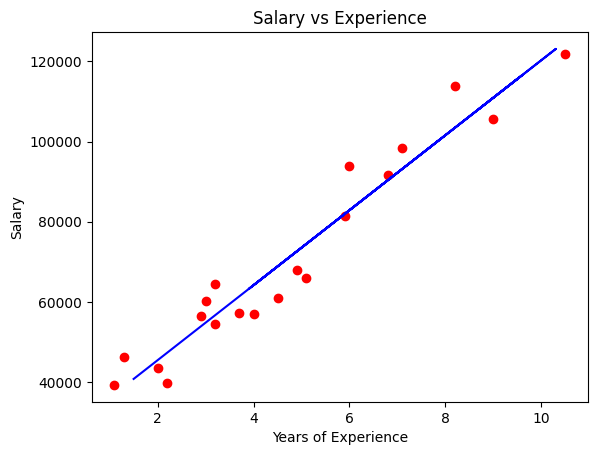

In [56]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_pred, color='blue')
#plt.scatter(x_test, y_test, color='green')
plt.title('Salary vs Experience')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

# Multiple Linear Regression

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing dataset and encoding

In [79]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML in udemy/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [80]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print(x,"\n\n",y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [81]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label = LabelEncoder()
x[:,3] = label.fit_transform(x[:,3])
print(x)

[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 [144372.41 118671.85 383199.62 2]
 [142107.34 91391.77 366168.42 1]
 [131876.9 99814.71 362861.36 2]
 [134615.46 147198.87 127716.82 0]
 [130298.13 145530.06 323876.68 1]
 [120542.52 148718.95 311613.29 2]
 [123334.88 108679.17 304981.62 0]
 [101913.08 110594.11 229160.95 1]
 [100671.96 91790.61 249744.55 0]
 [93863.75 127320.38 249839.44 1]
 [91992.39 135495.07 252664.93 0]
 [119943.24 156547.42 256512.92 1]
 [114523.61 122616.84 261776.23 2]
 [78013.11 121597.55 264346.06 0]
 [94657.16 145077.58 282574.31 2]
 [91749.16 114175.79 294919.57 1]
 [86419.7 153514.11 0.0 2]
 [76253.86 113867.3 298664.47 0]
 [78389.47 153773.43 299737.29 2]
 [73994.56 122782.75 303319.26 1]
 [67532.53 105751.03 304768.73 1]
 [77044.01 99281.34 140574.81 2]
 [64664.71 139553.16 137962.62 0]
 [75328.87 144135.98 134050.07 1]
 [72107.6 127864.55 353183.81 2]
 [66051.52 182645.56 118148.2 1]
 [65605.48 153032.0

In [82]:
one = OneHotEncoder()
a = one.fit_transform(x[:,3].reshape(-1,1)).toarray()
a[:2]

array([[0., 0., 1.],
       [1., 0., 0.]])

In [83]:
# Avoiding the Dummy Variable Trap
a=a[:,1:]
a[:2]

array([[0., 1.],
       [0., 0.]])

In [84]:
x = x[:,:-1]
x = np.hstack((a,x))
x[:2]

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53]], dtype=object)

## Splitting, Fitting and Prediction

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [71]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [86]:
y_pred = reg.predict(x_test)

In [87]:
for i,j in zip(y_test, y_pred):
  print(x, "-----------",y)

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 134615.46 147198.87 127716.82]
 [1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 120542.52 148718.95 311613.29]
 [0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 101913.08 110594.11 229160.95]
 [0.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 93863.75 127320.38 249839.44]
 [0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 86419.7 153514.11 0.0]
 [0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 73994.56 122782.75 303319.26]
 [1.0 0.0 67532.53 105751.03 304768.73]
 [0.0 1.0 77044.01 99281.34 140574.81]
 [0

## To Improve Accuracy

In [88]:
print(x)

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 134615.46 147198.87 127716.82]
 [1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 120542.52 148718.95 311613.29]
 [0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 101913.08 110594.11 229160.95]
 [0.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 93863.75 127320.38 249839.44]
 [0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 86419.7 153514.11 0.0]
 [0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 73994.56 122782.75 303319.26]
 [1.0 0.0 67532.53 105751.03 304768.73]
 [0.0 1.0 77044.01 99281.34 140574.81]
 [0

In [89]:

x = np.append(arr = np.ones((50,1)).astype(int), values=x, axis=1)

In [90]:
print(x)

[[1 0.0 1.0 165349.2 136897.8 471784.1]
 [1 0.0 0.0 162597.7 151377.59 443898.53]
 [1 1.0 0.0 153441.51 101145.55 407934.54]
 [1 0.0 1.0 144372.41 118671.85 383199.62]
 [1 1.0 0.0 142107.34 91391.77 366168.42]
 [1 0.0 1.0 131876.9 99814.71 362861.36]
 [1 0.0 0.0 134615.46 147198.87 127716.82]
 [1 1.0 0.0 130298.13 145530.06 323876.68]
 [1 0.0 1.0 120542.52 148718.95 311613.29]
 [1 0.0 0.0 123334.88 108679.17 304981.62]
 [1 1.0 0.0 101913.08 110594.11 229160.95]
 [1 0.0 0.0 100671.96 91790.61 249744.55]
 [1 1.0 0.0 93863.75 127320.38 249839.44]
 [1 0.0 0.0 91992.39 135495.07 252664.93]
 [1 1.0 0.0 119943.24 156547.42 256512.92]
 [1 0.0 1.0 114523.61 122616.84 261776.23]
 [1 0.0 0.0 78013.11 121597.55 264346.06]
 [1 0.0 1.0 94657.16 145077.58 282574.31]
 [1 1.0 0.0 91749.16 114175.79 294919.57]
 [1 0.0 1.0 86419.7 153514.11 0.0]
 [1 0.0 0.0 76253.86 113867.3 298664.47]
 [1 0.0 1.0 78389.47 153773.43 299737.29]
 [1 1.0 0.0 73994.56 122782.75 303319.26]
 [1 1.0 0.0 67532.53 105751.03 30476

### Backward Elimination

In [91]:
import statsmodels.api as sm
x_opt = np.array(x[:,[0,1,2,3,4,5]], dtype=float)
# endog - dependant var, exog - independan
reg_ols = sm.OLS(endog=y, exog=x_opt).fit()
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           1.34e-27
Time:                        13:50:30   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
x_opt = np.array(x[:,[0,1,3,4]], dtype=float)
# endog - dependant var, exog - independan
reg_ols = sm.OLS(endog=y, exog=x_opt).fit()
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     279.4
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           1.59e-29
Time:                        13:54:07   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1062.
Df Residuals:                      46   BIC:                             1069.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.459e+04   6121.987      8.917      0.000    4.23e+04    6.69e+04
x1          1111.1761   2893.049      0.384      0.703   -4712.230    6934.582
x2             0.8609      0.031     28.127      0.000       0.799       0.922
x3            -0.0527      0.050     -1.057      0.296      -0.153       0.048
==============================================================================
Omnibus:                       14.252   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.188
Skew:                          -0.953   Prob(JB):                     6.81e-05
Kurtosis:                       5.362   Cond. No.                     6.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
x_opt = np.array(x[:,[0,3,4]], dtype=float)
# endog - dependant var, exog - independan
reg_ols = sm.OLS(endog=y, exog=x_opt).fit()
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           7.29e-31
Time:                        13:54:29   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
x1             0.8621      0.030     28.589      0.000       0.801       0.923
x2            -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Forward Selection

In [108]:
x_opt1 = np.array(x[:,[0,3,4]],dtype=float)
reg_ols1 = sm.OLS(endog=y, exog=x_opt1).fit()
reg_ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           7.29e-31
Time:                        14:07:21   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
x1             0.8621      0.030     28.589      0.000       0.801       0.923
x2            -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Polynomial Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing and Fitting DataSet

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML in udemy/Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
x=data.iloc[:,1:2].values
y=data.iloc[:,-1].values
print(x,"\n",y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] 
 [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y)

LinearRegression()

## Visualising Data

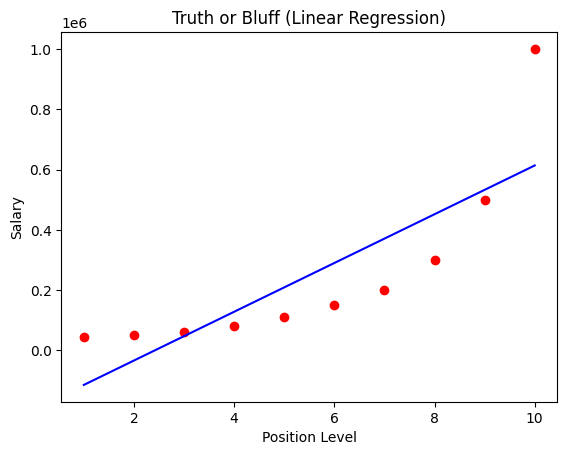

In [6]:
plt.scatter(x,y, color='red')
plt.plot(x, lin_reg.predict(x), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel("Salary")
plt.show()

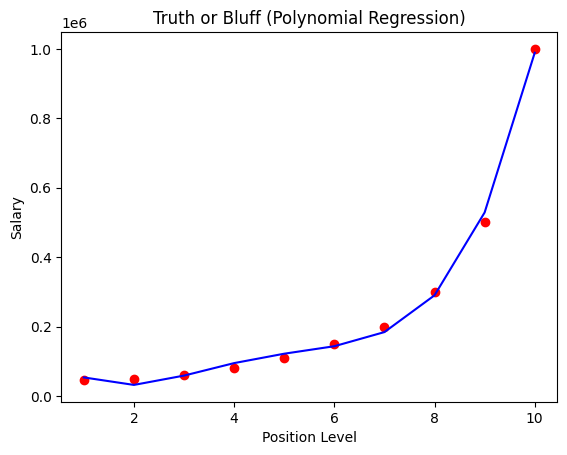

In [9]:
plt.scatter(x,y, color='red')
plt.plot(x, lin_reg2.predict(poly_reg.fit_transform(x)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel("Salary")
plt.show()

In [11]:
lin_reg.predict([[6]])

array([289939.39393939])

In [13]:
lin_reg2.predict(poly_reg.fit_transform([[6]]))

array([143275.05827509])

# Decision Tree (Regression)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML in udemy/Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [23]:
x=data.iloc[:,1:2].values
y=data.iloc[:,-1].values

In [24]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=0)
reg.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [25]:
y_pred = reg.predict([[6.5]])
print(y_pred)

[150000.]


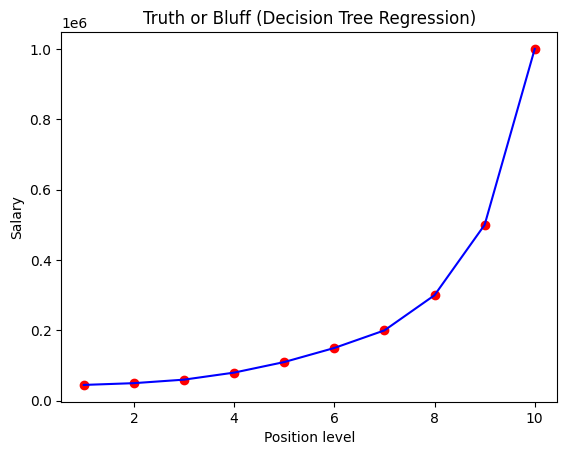

In [26]:
plt.scatter(x, y, color='red')
plt.plot(x, reg.predict(x), color='blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Random Forest (Regression)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML in udemy/Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
x = data.iloc[:,1:2].values
y = data.iloc[:,-1].values

In [4]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=300, random_state=0)
reg.fit(x,y)

RandomForestRegressor(n_estimators=300, random_state=0)

<ipython-input-5-ec7961815d02>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x), max(x), 0.01)


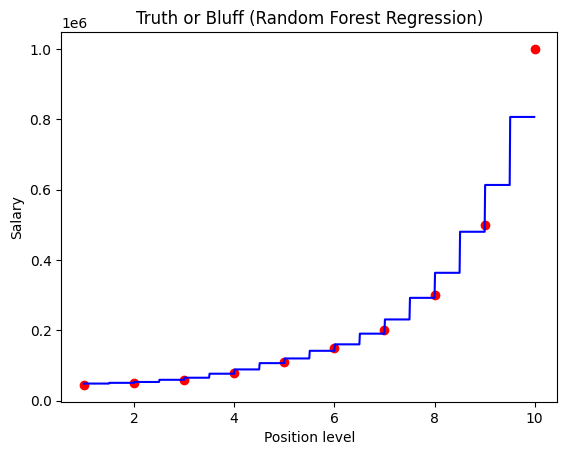

In [5]:
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y, color='red')
plt.plot(x_grid, reg.predict(x_grid), color='blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [6]:
y_pred = reg.predict([[6.5]])
print(y_pred)

[160333.33333333]


# Logistic Regression

In [7]:
import numpy as np
import pandas as pd

In [8]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML in udemy/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
x = data.iloc[:,2:4].values
y = data.iloc[:, 4].values

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [14]:
from sklearn.linear_model import LogisticRegression
cl = LogisticRegression(random_state=0)
cl.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [15]:
y_pred = cl.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, y_pred)
print(cn)

[[65  3]
 [ 8 24]]


# Support Vector Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML in udemy/Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
x = data.iloc[:,1:2].values
y = data.iloc[:,-1].values
y = y.reshape(len(y),1)

In [4]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [7]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [8]:
from sklearn.svm import SVR
reg = SVR(kernel='rbf')
reg.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [9]:
sc_y.inverse_transform(reg.predict(sc_x.transform([[6]])).reshape(-1, 1))
# The reshape(-1, 1) is now applied to the output of reg.predict before it's passed to sc_y.inverse_transform.
# This ensures that the input to inverse_transform is a 2D array as required.

array([[145503.10688572]])

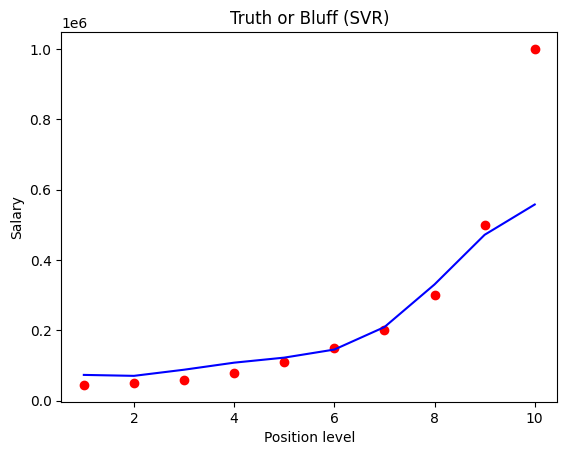

In [10]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(reg.predict(x).reshape(-1,1)), color='blue') # Added reshape(-1, 1) to the output of reg.predict
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

<ipython-input-14-82861181af0f>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)


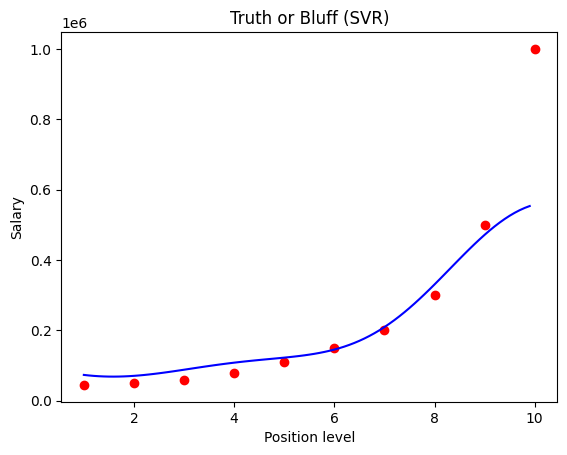

In [14]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.plot(x_grid, sc_y.inverse_transform(reg.predict(sc_x.transform(x_grid)).reshape(-1,1)), color='blue') #Reshape output of reg.predict
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# K-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML in udemy/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
x.shape

(200, 2)

In [4]:
x = data.iloc[:,[3,4]].values

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

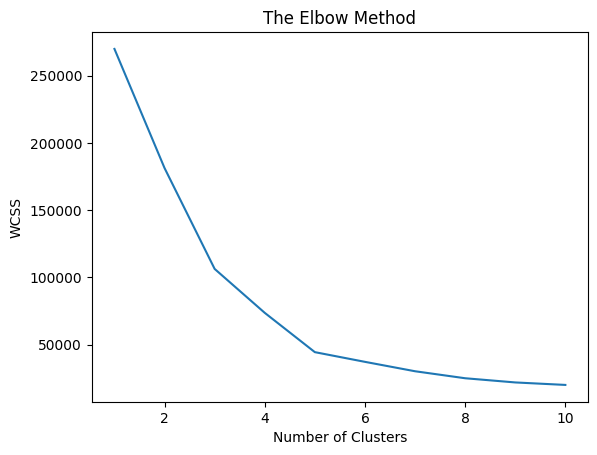

In [6]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS")
plt.show()

In [12]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


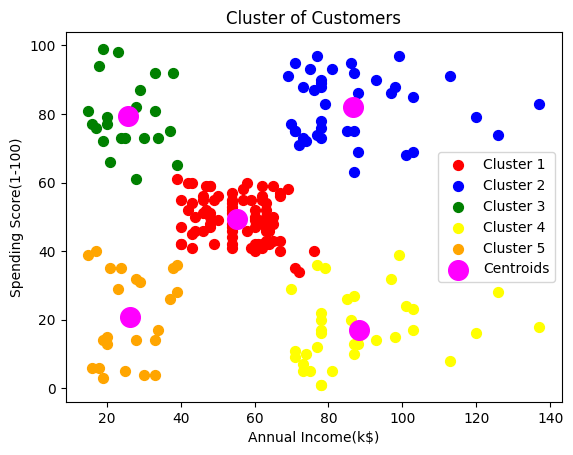

In [16]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=50, c='yellow', label='Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=50, c='orange', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='magenta', label='Centroids')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

# Heirarchial Clustering

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML in udemy/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
x = data.iloc[:, [3,4]].values
x.shape

(200, 2)

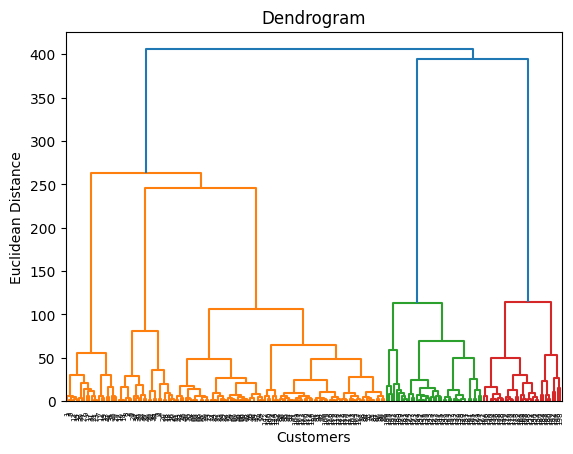

In [23]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [26]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

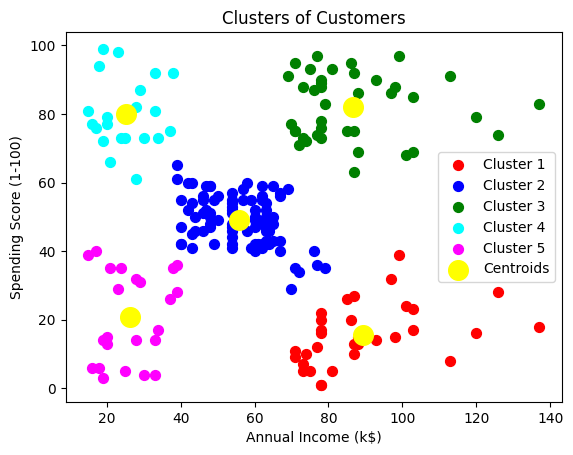

In [25]:
# prompt: show the graph with each cluster in different color and hhighlighting the centroid

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s=50, c='magenta', label='Cluster 5')
# There's no direct way to get centroids from AgglomerativeClustering
# We'll calculate them manually here
centroids = []
for i in range(5):
    cluster_points = x[y_hc == i]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)
centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
